In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from transformers import pipeline
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np

In [3]:
def predict(model_path,array_sentence):
  loaded_model = AutoModelForSequenceClassification.from_pretrained(model_path,local_files_only=True)
  tokenizer = AutoTokenizer.from_pretrained(model_path)


  classifier = pipeline(
      "text-classification",
      model=loaded_model,
      tokenizer=tokenizer,
      return_all_scores=True
  )
  results = classifier(array_sentence)
  for i, result in enumerate(results):
      max=0
      emo=''
      print(f"sentence: {array_sentence[i]}")
      print(f"result: {result}")
      for j in range(len(result)):
        if result[j]['score']>max:
          max=result[j]['score']
          emo=result[j]['label']
      print('class :',emo)
      print()

In [4]:
sentences = [
    "امروز خیلی روز غم انگیزی بود امیدوارم هیچ وقت تکرار نشه",
    "چرا همچین اشتباهی کردی من ازت متنفرم",
    "چه جمله خنده داری"
]

predict("/content/drive/MyDrive/save_best_model",sentences)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


sentence: امروز خیلی روز غم انگیزی بود امیدوارم هیچ وقت تکرار نشه
result: [{'label': 'SAD', 'score': 0.9440757632255554}, {'label': 'HATE', 'score': 0.018382325768470764}, {'label': 'OTHER', 'score': 0.007350400555878878}, {'label': 'FEAR', 'score': 0.00608815485611558}, {'label': 'ANGRY', 'score': 0.0020816423930227757}, {'label': 'HAPPY', 'score': 0.01949799247086048}, {'label': 'SURPRISE', 'score': 0.0025237768422812223}]
class : SAD

sentence: چرا همچین اشتباهی کردی من ازت متنفرم
result: [{'label': 'SAD', 'score': 0.004411958623677492}, {'label': 'HATE', 'score': 0.9798029065132141}, {'label': 'OTHER', 'score': 0.002621607156470418}, {'label': 'FEAR', 'score': 0.002764153527095914}, {'label': 'ANGRY', 'score': 0.002995338523760438}, {'label': 'HAPPY', 'score': 0.000953817623667419}, {'label': 'SURPRISE', 'score': 0.006450287066400051}]
class : HATE

sentence: چه جمله خنده داری
result: [{'label': 'SAD', 'score': 0.016603756695985794}, {'label': 'HATE', 'score': 0.004524085205048323}

In [5]:
def plot_confusion_matrix(y_test,y_scores, classNames):
    # y_test=np.argmax(y_test, axis=1)
    # y_scores=np.argmax(y_scores, axis=1)
    classes = len(classNames)
    cm = confusion_matrix(y_test, y_scores)
    print("**** Confusion Matrix ****")
    print(cm)
    print("**** Classification Report ****")
    print(classification_report(y_test, y_scores, target_names=classNames))
    con = np.zeros((classes,classes))
    for x in range(classes):
        for y in range(classes):
            con[x,y] = cm[x,y]/np.sum(cm[x,:])

    plt.figure(figsize=(40,40))
    sns.set(font_scale=3.0) # for label size
    df = sns.heatmap(con, annot=True,fmt='.2', cmap='Blues',xticklabels= classNames , yticklabels= classNames)
    df.figure.savefig("image2.png")

In [6]:
def evaluate(model_path,file_path):
  df = pd.read_csv(file_path)
  sentences=list(df['text'])
  Y_true= list(df['label'])
  emotions=df['label'].unique()

  Y_pred=[]

  print(sentences)
  print(Y_true)

  loaded_model = AutoModelForSequenceClassification.from_pretrained(model_path,local_files_only=True)
  tokenizer = AutoTokenizer.from_pretrained(model_path)

  classifier = pipeline(
      "text-classification",
      model=loaded_model,
      tokenizer=tokenizer,
      return_all_scores=True
  )
  results = classifier(sentences)
  print(results)
  for i, result in enumerate(results):
      max=0
      emo=''
      for j in range(len(result)):
        if result[j]['score']>max:
          max=result[j]['score']
          emo=result[j]['label']
      Y_pred.append(emo)
  print(Y_pred)
  c=0
  count=0
  for truth,pred in zip(Y_true,Y_pred):
    if truth!=pred:
      print(sentences[c],'\n','true',truth,'\n','pred',pred,'\n')
      print("****************")
      count+=1
    if count>10:
      break
    c+=1

  precision = precision_score(Y_true, Y_pred, average='macro')
  recall = recall_score(Y_true, Y_pred, average='macro')
  f1 = f1_score(Y_true, Y_pred, average='macro')
  accuracy = accuracy_score(Y_true, Y_pred)

  print("Precision: ", precision)
  print("Recall: ", recall)
  print("F1 score: ", f1)
  print("accuracy: ", accuracy)

  plot_confusion_matrix(Y_true,Y_pred, emotions)



['این شاید اولین عزای عمومی واقعی است که یاد دارم . تمام وجودم عزادار است ؛ پر از گریه ، پر از خشم ، پر از فریاد . مثل همهی شما . . آتشنشان تسلیت', 'دیشب بعد از ارسال تویت مربوط به آثار باستانی تویت دیگری نوشتم ولی هرچه منتظر شدم ارسال نشد ، از همون موقع تا الان تویتر نداشتم ، ناراحت\u200cبودم که نکنه پیامی داده باشین ومن نبینم که الحمدالله خبری نیست خوب ، چه خبر ؟ من نبودم خوش گذشته ؟', 'کدوم شعبه پول نداده ، بگو الان برات آمار دقیق بدم ، شعار الکی نده ، هرکی برداشت پولشو کمتر از دو ساعت برگردوند وقتی فهمید کلاه سرش رفته و هیچ بانکی مثل آینده بهش نه خدمات میده نه سود', 'امروز وسط یه بحث با بابا مامانم گفتم آدم باید تلاش کنه شادی تو قلبش باشه بعدش میخواستم پاشم دور افتخار بزنم به خاطر حماسهای که خلق کردم !', 'امشب گفت نامزدی دوستش که ادم روشنفکری است بهم خورده و دختر بشدت نگران حرف مردم گفتم وای به مردم روشنفکرمون که نگران مردمند پس تقصیری بر مادر حاشیه من نیست که بعد از یکسال و درگوشی درمورد تجاوز به دخترش حرف میزنه و ترس از ابرو داره زنان را بشنوید', 'به امید موفقیت تیم ملی ایران و پ

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


[[{'label': 'SAD', 'score': 0.942394495010376}, {'label': 'HATE', 'score': 0.009745734743773937}, {'label': 'OTHER', 'score': 0.014541896991431713}, {'label': 'FEAR', 'score': 0.01177473645657301}, {'label': 'ANGRY', 'score': 0.0060137491673231125}, {'label': 'HAPPY', 'score': 0.012237082235515118}, {'label': 'SURPRISE', 'score': 0.0032923195976763964}], [{'label': 'SAD', 'score': 0.8956930637359619}, {'label': 'HATE', 'score': 0.006772560998797417}, {'label': 'OTHER', 'score': 0.010975134558975697}, {'label': 'FEAR', 'score': 0.005427856929600239}, {'label': 'ANGRY', 'score': 0.009697061032056808}, {'label': 'HAPPY', 'score': 0.06109858676791191}, {'label': 'SURPRISE', 'score': 0.01033572107553482}], [{'label': 'SAD', 'score': 0.21258963644504547}, {'label': 'HATE', 'score': 0.02049848437309265}, {'label': 'OTHER', 'score': 0.22760780155658722}, {'label': 'FEAR', 'score': 0.007348588667809963}, {'label': 'ANGRY', 'score': 0.5183748006820679}, {'label': 'HAPPY', 'score': 0.007195719983

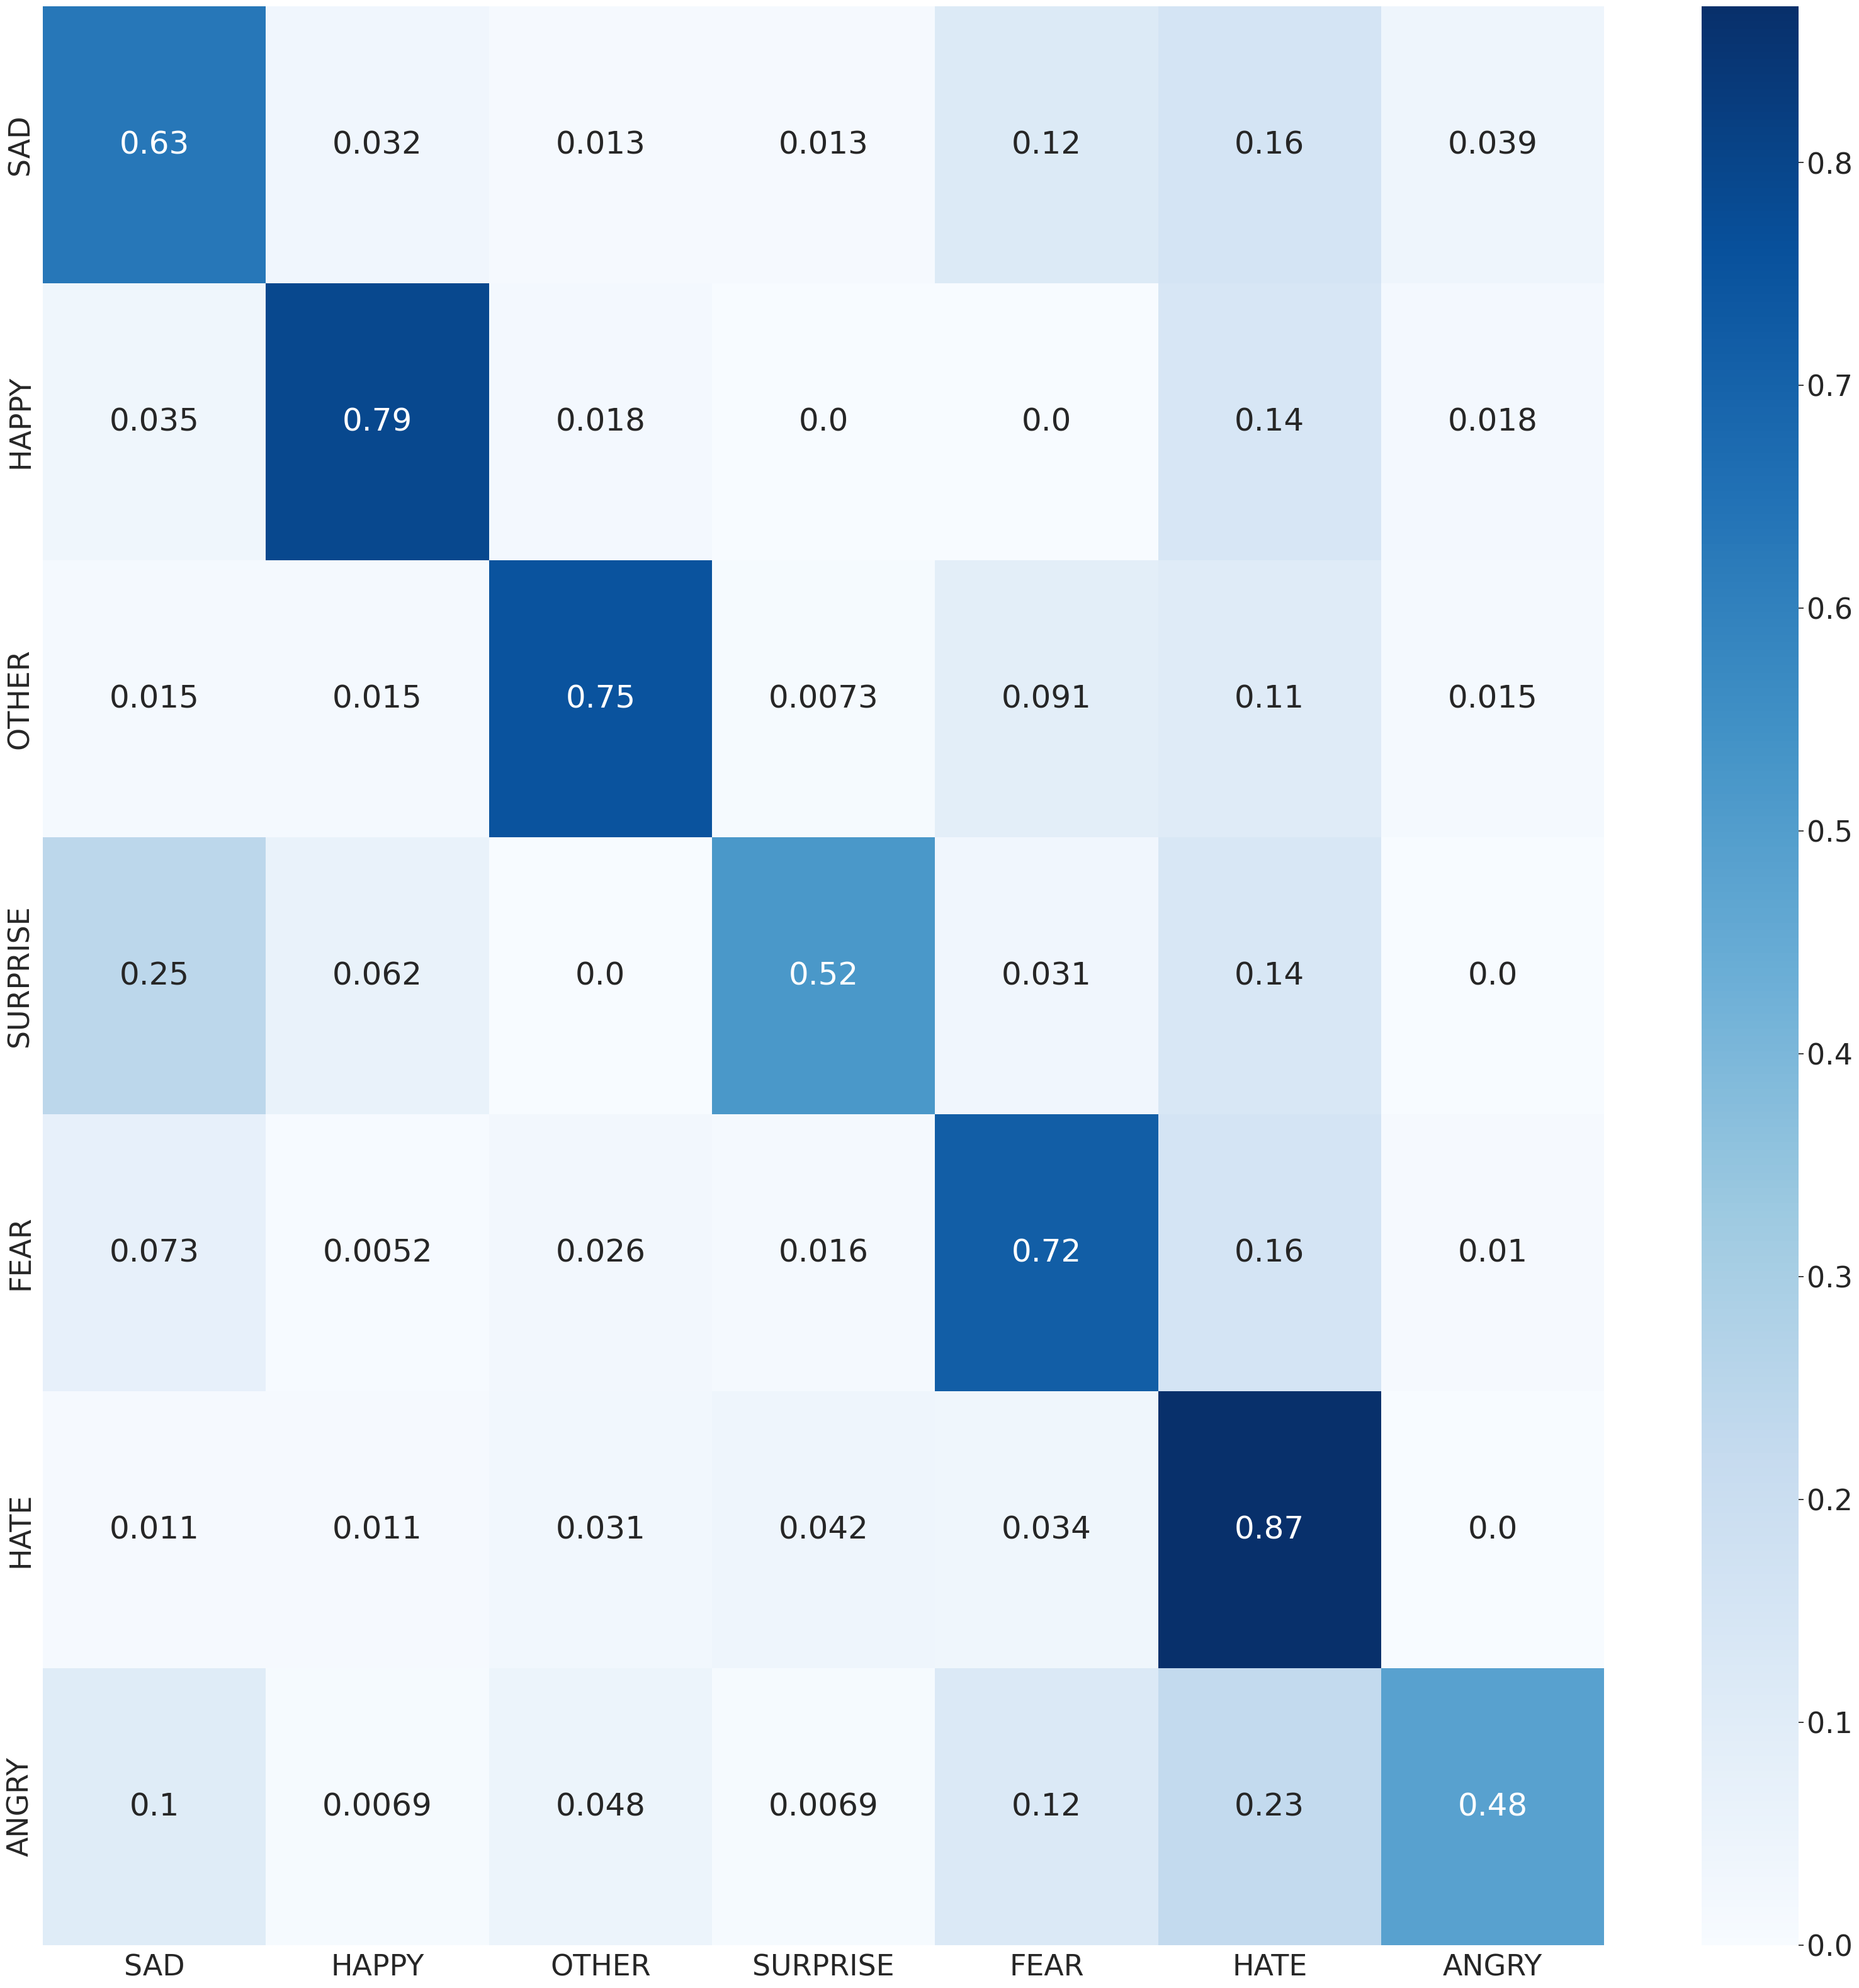

In [8]:
evaluate('/content/drive/MyDrive/save_best_model','/content/test.csv')

<h2>Evaluate in Test file
</h2>